Name:Faiza Abbasi <BR>
Email: faizaabbasi988@gmail.com


In [1]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 1.6 MB 49.5 MB/s 
     |████████████████████████████████| 438 kB 45.8 MB/s 
     |████████████████████████████████| 5.8 MB 45.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.9.1


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
dataset.shape

(10000, 14)

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# we fit transformed train data and only trandormed test data to avoid bias or data leakage
# fit tranform calculates mean, std and variance of the data it is applied on and then tranforms accordingly however tranform uses the parameters that fit transform has already set
# we do not want the mean, sd of testing data to be known because it will cause data leakage so we use tranform only on test data which uses parameters of fit transform

In [11]:
# Part 2 - Now let's make the ANN!

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [13]:
# Initialising the ANN
classifier = Sequential()

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [17]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", 
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [30]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50, callbacks=early_stopping)
# early stopping will monitor val_loss and if its not improving, it will stop iterations to save computational power

Epoch 1/50
536/536 [==============================] - 3s 5ms/step - loss: 0.3431 - accuracy: 0.8612 - val_loss: 0.4449 - val_accuracy: 0.8470
Epoch 2/50
536/536 [==============================] - 3s 5ms/step - loss: 0.3418 - accuracy: 0.8597 - val_loss: 0.4310 - val_accuracy: 0.8497
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3478 - accuracy: 0.8587 - val_loss: 0.4161 - val_accuracy: 0.8489
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3534 - accuracy: 0.8595 - val_loss: 0.4167 - val_accuracy: 0.8489
Epoch 5/50
536/536 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.8576 - val_loss: 0.4173 - val_accuracy: 0.8478
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8578 - val_loss: 0.4143 - val_accuracy: 0.8485
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3429 - accuracy: 0.8606 - val_loss: 0.4090 - val_accuracy: 0.8482
Epoch 

In [19]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


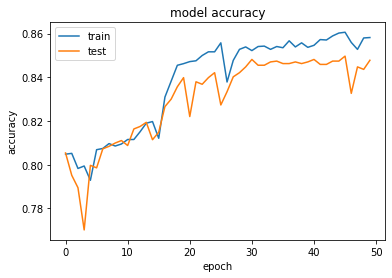

In [20]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

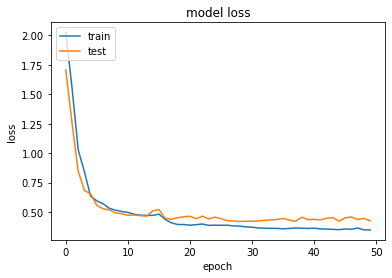

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # for 0.5 and greater its gonna store value hence 1 otherwise we consider 0

63/63 [==============================] - 0s 1ms/step


In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1514,   81],
       [ 197,  208]])

In [24]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [25]:
score

0.861

In [33]:
classifier.get_weights()

[array([[ 0.02349184,  0.00366971,  0.04719579, -0.02674288, -0.10880747,
         -0.15496732,  0.05875699, -0.11199907,  0.05744679,  0.11266763,
         -0.05243513],
        [ 0.18247727, -0.08588362, -0.3490298 ,  0.39210862,  0.3660074 ,
         -0.5467276 ,  0.12946622, -0.47195148, -0.17063427, -0.5924939 ,
         -0.46035275],
        [-0.00556727,  0.14426577,  0.01934553,  0.046714  , -0.00588105,
         -0.06656799,  0.02063555, -0.16004688, -0.0620793 , -0.11149038,
          0.02873606],
        [ 0.36785617, -0.10554378, -0.04094346,  0.04958816, -0.36663267,
          0.07254324,  0.02649153,  0.30080962,  0.62878436,  0.00140821,
         -0.25867116],
        [ 0.9678845 ,  0.33540064,  0.3404392 ,  0.14074996, -0.5704568 ,
         -0.37825057, -0.36642677, -0.04247238, -0.0981002 ,  0.07198524,
         -0.12247468],
        [ 0.0138798 , -0.01968557, -0.03233592, -0.03700705, -0.01853688,
          0.03035286, -0.09265164,  0.17714643, -0.02944871,  0.1936188

In [38]:
from google.colab import files

In [42]:
files.download('Churn_Modelling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>